# Flight Delay Prediction Model

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 


In [2]:
jan=pd.read_csv("Jan_2019_ontime.csv")
jan1=pd.read_csv("Jan_2020_ontime.csv")
jan1.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [3]:
jan.loc[jan['DEP_TIME_BLK']=='0001-0559', 'DEP_TIME_BLK'] = '0500-0559'
print(jan.loc[[211]])

     DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID  \
211             1            2                9E                  20363   

    OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
211         9E   N602LR               5423              11423   

     ORIGIN_AIRPORT_SEQ_ID ORIGIN  ...  DEST  DEP_TIME DEP_DEL15  \
211                1142307    DSM  ...   ATL     540.0       0.0   

     DEP_TIME_BLK  ARR_TIME ARR_DEL15  CANCELLED  DIVERTED  DISTANCE  \
211     0500-0559     909.0       0.0        0.0       0.0     743.0   

     Unnamed: 21  
211          NaN  

[1 rows x 22 columns]


Text(0, 0.5, 'Arrival delay (in minutes)')

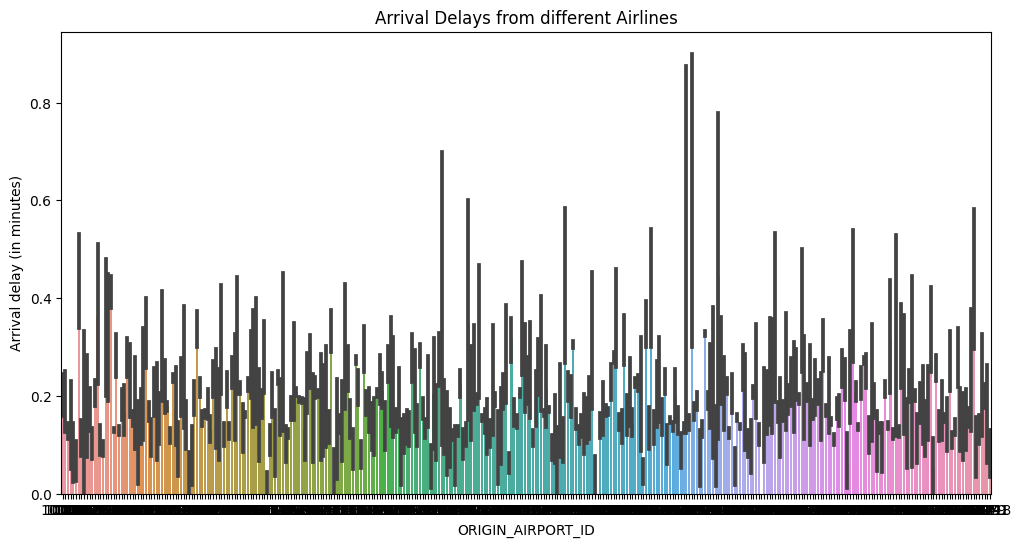

In [4]:
plt.figure(figsize=(12,6))
plt.title("Arrival Delays from different Airlines")
sns.barplot(x=jan.ORIGIN_AIRPORT_ID, y=jan['ARR_DEL15'])
plt.ylabel("Arrival delay (in minutes)")

Text(0, 0.5, 'Arrival delay (in minutes)')

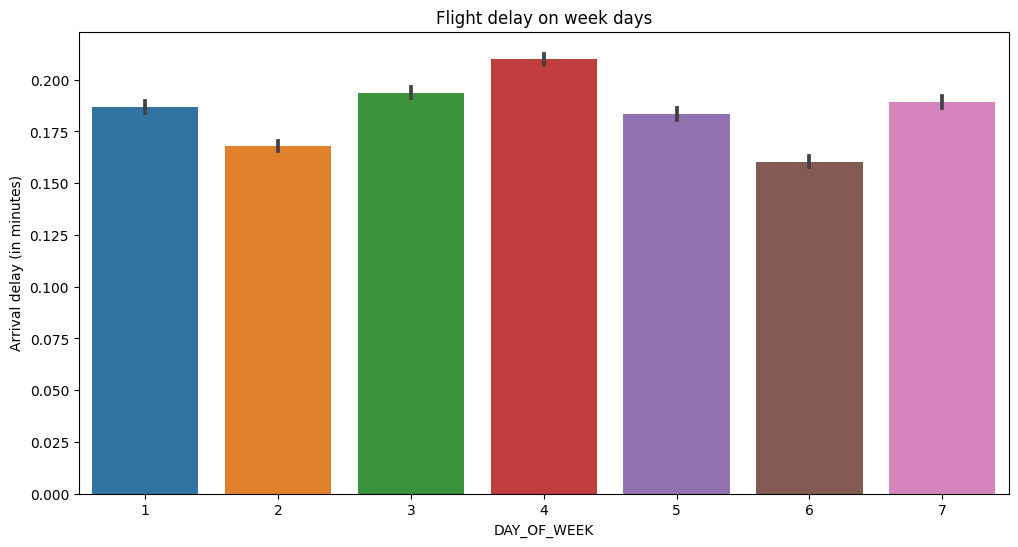

In [5]:
plt.figure(figsize=(12,6))
plt.title("Flight delay on week days")
sns.barplot(x=jan.DAY_OF_WEEK, y=jan['ARR_DEL15'])
plt.ylabel("Arrival delay (in minutes)")

In [6]:
jan.isna().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                   2543
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                  16352
DEP_DEL15                 16355
DEP_TIME_BLK                  0
ARR_TIME                  17061
ARR_DEL15                 18022
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              583985
dtype: int64

In [7]:
jan.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [8]:
jan1.isna().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                    698
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                   6664
DEP_DEL15                  6699
DEP_TIME_BLK                  0
ARR_TIME                   7075
ARR_DEL15                  8078
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              607346
dtype: int64

In [9]:
jan1.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [10]:
jan = jan[(jan.CANCELLED != 1) & (jan.DEP_TIME.isna() == False) & (jan.ARR_TIME.isna() == False)]
len(jan.CANCELLED.isna()), len(jan.DEP_TIME.isna()), len(jan.ARR_TIME.isna()), len(jan)
jan = jan[(jan.ARR_DEL15.isna() == False)]
jan.isna().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                      0
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                      0
DEP_DEL15                     0
DEP_TIME_BLK                  0
ARR_TIME                      0
ARR_DEL15                     0
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              565963
dtype: int64

In [11]:
jan.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [12]:
cols=['Unnamed: 21', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'DIVERTED', 'CANCELLED',
      'ORIGIN', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_SEQ_ID',
      'DEST_AIRPORT_SEQ_ID', 'DEST', 'DAY_OF_MONTH', 'OP_UNIQUE_CARRIER']

jan=jan.drop(cols,axis=1)


In [13]:
jan.isna().sum()

DAY_OF_WEEK          0
ORIGIN_AIRPORT_ID    0
DEST_AIRPORT_ID      0
DEP_TIME             0
DEP_DEL15            0
DEP_TIME_BLK         0
ARR_TIME             0
ARR_DEL15            0
DISTANCE             0
dtype: int64

In [14]:
def get_day_category(day_of_week):
    if day_of_week <= 5:
        return 0 
    elif day_of_week > 5:
        return 1 
    
jan.DAY_OF_WEEK = jan.DAY_OF_WEEK.apply(get_day_category)
jan.rename(columns={'DAY_OF_WEEK':'type_of_day'})

,type_of_day,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE
0,0,11953,10397,601.0,0.0,0600-0659,722.0,0.0,300.0
1,0,13487,11193,1359.0,0.0,1400-1459,1633.0,0.0,596.0
2,0,11433,11193,1215.0,0.0,1200-1259,1329.0,0.0,229.0
3,0,15249,10397,1521.0,0.0,1500-1559,1625.0,0.0,223.0
4,0,10397,11778,1847.0,0.0,1900-1959,1940.0,0.0,579.0
...,...,...,...,...,...,...,...,...,...
583980,0,12016,12173,749.0,0.0,0700-0759,1832.0,0.0,3801.0
583981,0,12016,14955,717.0,0.0,0700-0759,759.0,0.0,129.0
583982,0,14955,12016,857.0,0.0,0900-0959,933.0,0.0,129.0
583983,0,14955,12016,1820.0,0.0,1800-1859,1854.0,0.0,129.0


In [15]:
jan['origin_day_avg'] = jan.groupby(['ORIGIN_AIRPORT_ID','DAY_OF_WEEK'])['DEP_TIME'].transform('mean').astype(np.float16)

jan['dest_day_avg'] = jan.groupby(['DEST_AIRPORT_ID','DAY_OF_WEEK'])['ARR_TIME'].transform('mean').astype(np.float16)

In [16]:

def new_arrival_delay(dep_delay, arr_delay):
    if np.isnan(arr_delay):
        return dep_delay
    else:
        return arr_delay

jan['ARR_DEL15'] = jan.apply(lambda row :new_arrival_delay(row['DEP_DEL15'],row['ARR_DEL15']), axis = 1)

In [17]:

blocks = []
for hour in range(0,24):
    hour_part = ('%02d' %(hour))
    blocks.append(hour_part + '00-' + hour_part + '59')
blocks
def arrival_time_blk(arr_time):
    arr_hour = str('%04d' %(arr_time))[:2]
    arr_block = None
    for block in blocks:
        if block.startswith(arr_hour):
            arr_block = block
            break
    if arr_block == None and str(arr_time) == '2400.0':
        arr_block = '0000-0059'
    return arr_block

jan['ARR_TIME_BLK'] = jan.ARR_TIME.apply(arrival_time_blk)
jan.drop(['ARR_TIME'], inplace=True, axis=1)

In [18]:
le = LabelEncoder()
le.fit(blocks)
le.classes_
jan['ARR_TIME_BLK'] = le.transform(jan.ARR_TIME_BLK.values)
jan['DEP_TIME_BLK'] = le.transform(jan.DEP_TIME_BLK.values)

In [19]:
jan= jan.reindex(sorted(jan.columns), axis=1)

In [20]:
jan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565963 entries, 0 to 583984
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ARR_DEL15          565963 non-null  float64
 1   ARR_TIME_BLK       565963 non-null  int32  
 2   DAY_OF_WEEK        565963 non-null  int64  
 3   DEP_DEL15          565963 non-null  float64
 4   DEP_TIME           565963 non-null  float64
 5   DEP_TIME_BLK       565963 non-null  int32  
 6   DEST_AIRPORT_ID    565963 non-null  int64  
 7   DISTANCE           565963 non-null  float64
 8   ORIGIN_AIRPORT_ID  565963 non-null  int64  
 9   dest_day_avg       565963 non-null  float16
 10  origin_day_avg     565963 non-null  float16
dtypes: float16(2), float64(4), int32(2), int64(3)
memory usage: 41.0 MB


In [21]:
jan= jan.drop(['DEP_TIME','DEP_DEL15'], axis=1)

In [22]:
jan.isna().sum()

ARR_DEL15            0
ARR_TIME_BLK         0
DAY_OF_WEEK          0
DEP_TIME_BLK         0
DEST_AIRPORT_ID      0
DISTANCE             0
ORIGIN_AIRPORT_ID    0
dest_day_avg         0
origin_day_avg       0
dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
Y = jan['ARR_DEL15'].values
X = jan.drop(['ARR_DEL15'], axis=1).values

X_train, X_test, Y_train, Y_test =  train_test_split(X,Y, test_size=0.2, random_state=1)

In [24]:
X_train.shape

(452770, 8)

In [25]:
X_test.shape

(113193, 8)

In [26]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [27]:
predicted = model.predict(X_test)
model.score(X_test, Y_test)

0.8987658247418127

In [28]:
from sklearn.metrics  import classification_report,confusion_matrix,f1_score
model_predictions = model.predict(X_test)
print("confusion matrix is:\n",confusion_matrix(Y_test, model_predictions))

print("\nClassification report is:\n",classification_report(Y_test, model_predictions))

confusion matrix is:
 [[89465  2697]
 [ 8762 12269]]

Classification report is:
               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     92162
         1.0       0.82      0.58      0.68     21031

    accuracy                           0.90    113193
   macro avg       0.87      0.78      0.81    113193
weighted avg       0.89      0.90      0.89    113193

